# HW2 Embedding

## Overview

In this homework, you will try some embedding models on text data and visualize those learned embeddings.

---

In [47]:
import os
import sys

DATA_PATH = "../HW2_Embedding-lib/data/"

---

## About Raw Data

Navigate to `DATA_PATH`, there is a csv file used for training. The data is originally from the [NFCorpus database](https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/).

In [48]:
!ls {DATA_PATH}

corpus.csv


The data provided in *corpus.csv* consists of medical articles from [PubMed](https://pubmed.ncbi.nlm.nih.gov).

In [49]:
import pandas as pd


def load_dataset(filepath):    
    """ Read the cospus.csv file """
    return pd.read_csv(filepath)


corpus_df = load_dataset(os.path.join(DATA_PATH, 'corpus.csv'))
corpus_df.head()

,ID,TEXT
0,MED-10,"Recent studies have suggested that statins, an..."
1,MED-14,BACKGROUND: Preclinical studies have shown tha...
2,MED-118,The aims of this study were to determine the c...
3,MED-301,Epilepsy or seizure disorder is one of the mos...
4,MED-306,Hit Reaction Time latencies (HRT) in the Conti...


## 1 Word2Vec [60 points]

In this question, you will perform word2vec on the given NFCorpus dataset.

### 1.1 Preprocess the text data [20 points]

In order to preprocess the text data, you should:
- Remove newline ('\n')
- Remove carriage returns ('\r')
- Remove punctuations
- Remove numbers
- Convert to lower-case
- Split each sentence into a list of words

In [50]:
import time
import numpy as np
import string
import re
from string import digits
from nltk import word_tokenize


# PLEASE USE THE GIVEN FUNCTION NAME, DO NOT CHANGE IT


#input
# corpus_df: a dataframe returned by `load_dataset`
#output
# corpus_processed: a list of articles where each article is broke into a list of words 
def preprocess_dataset(df):    
    ''' Preprocess the text data. And return a list of articles. '''
    corpus_processed = []
    
    df.TEXT = df.TEXT.str.replace('\n', '')  # remove newline
    df.TEXT = df.TEXT.str.replace('\r', '')  # carriage returns
    """
    TODO: 1. remove punc;
          2. remove numbers.
          
    HINT: consider using `string.punctuation`, `str.maketrans`, and `str.translate`.
    """
    # your code here
    #raise NotImplementedError
    
    df.TEXT = df.TEXT.str.translate(str.maketrans('', '', string.punctuation))
    
    df.TEXT = df.TEXT.str.translate(str.maketrans('', '', string.digits))
    
    df.TEXT = df.TEXT.str.lower()  # convert to lower case
    
    # tokenize
    for note in df.TEXT.values:
        note_tokenized = word_tokenize(note)
        corpus_processed.append(note_tokenized)

    return corpus_processed

In [51]:
corpus_processed = preprocess_dataset(corpus_df)

In [52]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert len(corpus_processed) == 3633

for article in corpus_processed:
    assert '/' not in article, "punctuation '/' is not removed!"
    assert '1' not in article, "number '1' is not removed!"

In [53]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

### 1.2 Train a word2vec model [20 points]

Now that your data is pre-processed, your training dataset is ready. We will be using Word2Vec from gensim. You should:
1. Set the word vector size to 100. 
2. Ignores all words with total frequency lower than (<) 20. 
3. use only 1 worker (workers=1) to ensure deterministic behavior
4. set the seed to the provided value RANDOM_SEED
Keep the other paramters as default. Train the model (Word2Vec) on the training dataset.

REFERENCE: [tutorial](https://radimrehurek.com/gensim/models/word2vec.html)

In [59]:
RANDOM_SEED = 23432098
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# DO NOT modify these (or Coursera may timeout)!
# Dimensionality of the word vectors
VEC_SIZE = 100
# Ignores all words with total frequency lower than this
MIN_COUNT = 20

from gensim.models import Word2Vec

"""
TODO: Train the Word2Vec model (`w2v_model`).
NOTE: Remember to set the `size` and `min_count`.
"""
w2v_model = None

w2v_model = Word2Vec(sentences=corpus_processed, vector_size=100, min_count=20, workers=1)# your code here
#raise NotImplementedError

assert w2v_model.workers == 1, "Please use only 1 worker for deterministic behavior."

In [60]:
print("Size of vocab: %d" % len(w2v_model.wv))

Size of vocab: 3660


In [61]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

assert isinstance(corpus_processed, list)
assert isinstance(w2v_model, Word2Vec)

In [62]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

### 1.3 Evaluate the model [20 points]

**Find distinct word*: Given three words (e.g. 'heart', 'lung' and 'protein'), find the distinct word (e.g. 'protein').

In [63]:
#input
# model: word2vec model
# list_of_words: a list of words, e.g. ['heart', 'lung', 'protein']
#output
# distinct_word: the distinct word
def find_distinct_word(model, words):
    
    """
    TODO: Find the distinct word from the list using the trained word2vec model.
    HINT: Consider the *doesnt_match* method.
    """
    return model.wv.doesnt_match(words)
    
    # your code here
    #raise NotImplementedError

In [66]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

list_of_words = ['heart', 'lung', 'protein']
assert type(find_distinct_word(w2v_model, list_of_words)) is str
print("The distinct word among '%s' is: '%s'." % (', '.join(list_of_words), find_distinct_word(w2v_model, list_of_words)))

list_of_words = ['carbohydrate', 'sugars', 'lung']
assert type(find_distinct_word(w2v_model, list_of_words)) is str
print("The distinct word among '%s' is: '%s'." % (', '.join(list_of_words), find_distinct_word(w2v_model, list_of_words)))

The distinct word among 'heart, lung, protein' is: 'protein'.
The distinct word among 'carbohydrate, sugars, lung' is: 'lung'.


In [67]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

**Similar words**: Given a word (e.g. 'blood'), find the list of words similar to this word (e.g. one such word is 'pressure').

In [77]:
#input: model: word2vec model
#       word: a single word, e.g. 'heart'
#output: list_of_words: a list of words similar to the given word
def similar_word(model, word):
    
    """
    TODO: Find the words similar to the given word.
    HINT: Consider the *most_similar* method.
    """
    
    list_of_words = []
    temp = model.wv.most_similar(word) 
    list_of_words = [a_tuple[0] for a_tuple in temp]
    # your code here
    #raise NotImplementedError
    
    
    return list_of_words

In [78]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

word = 'blood'
assert type(similar_word(w2v_model, word)) is list
print("The words similar to '%s' are: '%s'." % (word, ', '.join(similar_word(w2v_model, word))))

word = 'protein'
assert type(similar_word(w2v_model, word)) is list
print("The words similar to '%s' are: '%s'." % (word, ', '.join(similar_word(w2v_model, word))))

The words similar to 'blood' are: 'fasting, pressure, glucose, bp, systolic, diastolic, lipids, arterial, flow, resting'.
The words similar to 'protein' are: 'calcium, carbohydrate, iron, saturated, fats, fat, fibre, content, absorption, creactive'.


In [79]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

## 2 t-SNE, UMAP [40 points]

In this question, you will perform t-SNE and UMAP on the medical representations obtained from the previous sections.

In [80]:
# load the word2vec model from Q2
from gensim.models import Word2Vec

# words
W = list(w2v_model.wv.key_to_index.keys())
# embeddings
X = np.array([w2v_model.wv[w] for w in W])

# select only a subset of the words
X_subset = X[:1000]
W_subset = W[:1000]

In [81]:
import matplotlib.pyplot as plt
import random

def plot(X, Y, W):
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.plot(Y[:, 0], Y[:, 1], 'o')
    ax.set_yticklabels([]) #Hide ticks
    ax.set_xticklabels([]) #Hide ticks

    for i, word in enumerate(W):
        if random.uniform(0,1) > 0.9:
            plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
    plt.show()

### 2.1 t-SNE [20 points]

Perform t-SNE on `X_subset` and plot the results. 

REFERENCE: [tutorial](https://www.datacamp.com/community/tutorials/introduction-t-sne)

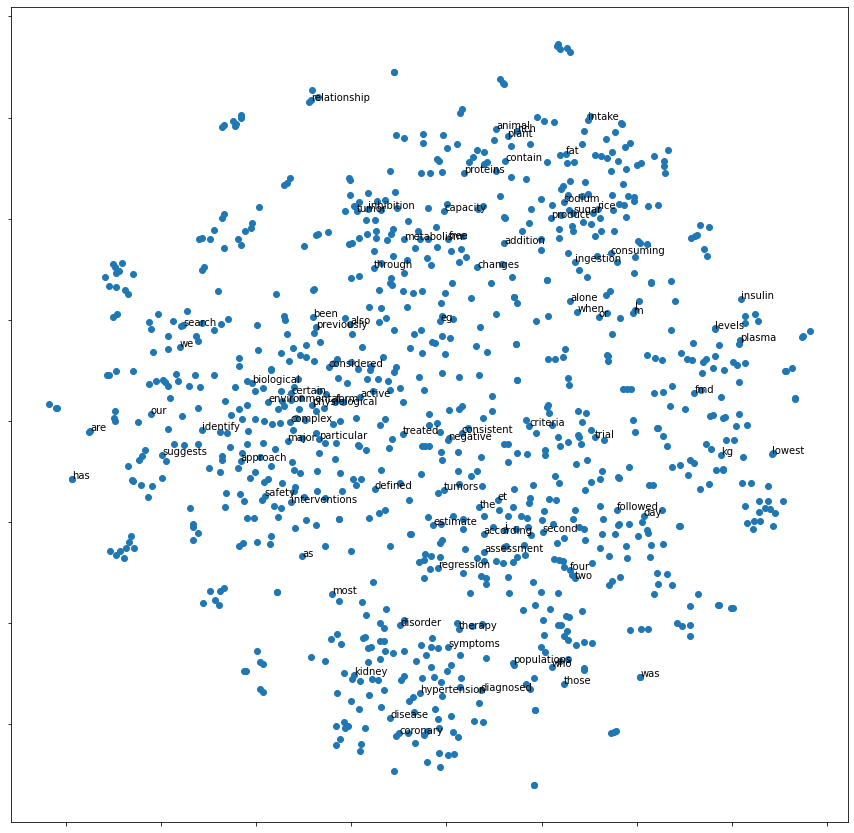

In [86]:
# t-SNE

from sklearn.manifold import TSNE


"""
TODO: Perform t-SNE on `X_subset`.
"""

Y_subset_tsne = None

Y_subset_tsne = TSNE().fit_transform(X_subset)
# your code here
#raise NotImplementedError

plot(X_subset, Y_subset_tsne, W_subset)

In [87]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

from inspect import signature

assert len(Y_subset_tsne)==1000, "Y_subset_tsne has wrong dimensions"
sig = signature(plot)
assert len(sig.parameters)==3, "need to plot all dimensions of t-SNE!"

In [88]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



'\nAUTOGRADER CELL. DO NOT MODIFY THIS.\n'

### 2.2 UMAP [20 points]

Perform UMAP on `X_subset` and plot the results. 

REFERENCE: [tutorial](https://umap-learn.readthedocs.io/en/latest/basic_usage.html#digits-data)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


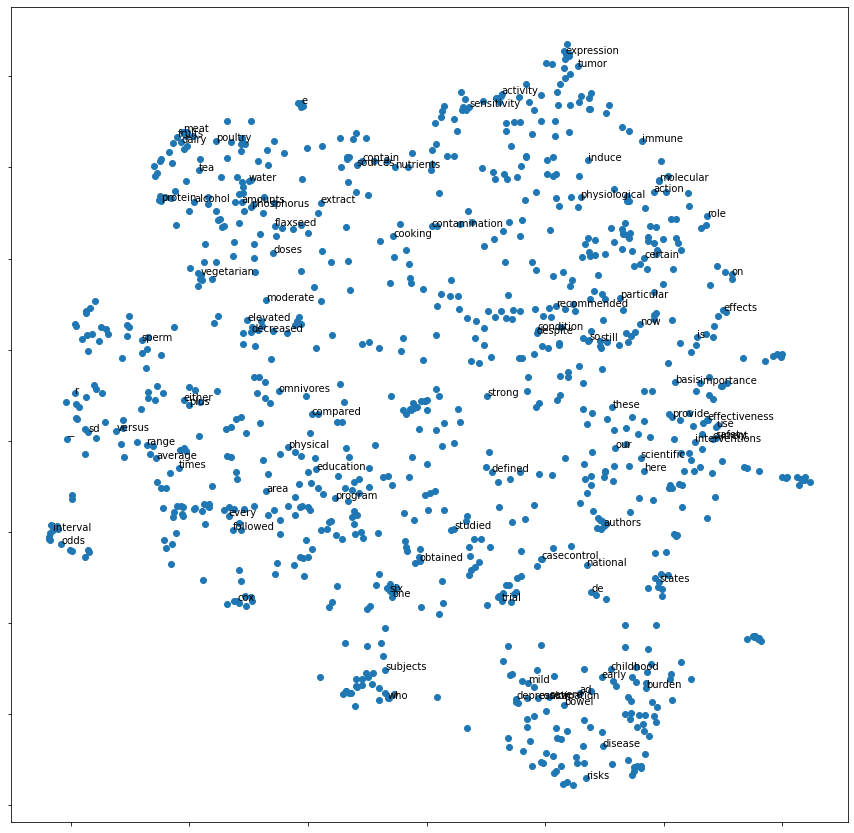

In [89]:
# UMAP

import umap.umap_ as umap #package is umap-learn


"""
TODO: Perform UMAP on `X_subset`.
"""

Y_subset_umap = None

reducer = umap.UMAP()

Y_subset_umap = reducer.fit_transform(X_subset)

# your code here
#raise NotImplementedError

plot(X_subset, Y_subset_umap, W_subset)

In [90]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

from inspect import signature

assert len(Y_subset_umap)==1000, "Y_subset_umap has wrong dimensions"
sig = signature(plot)
assert len(sig.parameters)==3, "need to plot all dimensions of UMAP!"

In [ ]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



Check if the embeddings make sense. Due to the hardware and runtime limitation, we cannot reach the state-of-the-art performance. But you will have chance to work with more advanced models in the project.